In [1]:
import numpy as np
import gym
import pandas as pd
import matplotlib.pyplot as plt

import lib.model as Model
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory

from wrapper import MyWrapper
import lib.utils as utils

from lib.analysis import basic
from lib.utils import BackTest

Using TensorFlow backend.


ModuleNotFoundError: No module named 'lib.wrapper'

In [1]:
from agent.agent import DiscreteAgent
from lib.config import Config

Using TensorFlow backend.


In [2]:
da = DiscreteAgent(config=Config('config/discrete-1.yaml'), save_name='test')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Colocations handled automatically by placer.


/home/zekechyo/stockExchange/lib/config.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.data = yaml.load(stream)
/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Environment '<class 'gym.envs.custom.env.TradingEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
da.fit()

Training for 2359 steps ...


'Data: data/txf1.csv'
'CumPnL: 8.70000000000016'
'Sharpe: 0.2958532131167245'
'Sortino: 0.40465974578461544'


 2358/2359: episode: 1, duration: 30.496s, episode steps: 2358, steps per second: 77, episode reward: 8.700, mean reward: 0.004 [-3.500, 2.650], mean action: 0.247 [0.000, 2.000], mean observation: 0.006 [-2.339, 1.000], loss: --, mean_q: --
done, took 30.516 seconds


In [4]:
da.save_weights()

In [5]:
da.load_weights('weights/dqn_Trading-v0_weights.h5f')

In [8]:
da.backtest(custom_dataset='data/test.csv')


_______________________________________________________________________________________________________


Accuracy:	34.17% 
Total:		1478
Avg Win:	11900.0%	Max Win:	2791425.37%
Avg Loss:	252.74%	Max Loss:	9683.63%
Max Drawdown: inf
Sharpe: 0.7152
Sortino: 95.609


In [9]:
from agent import ContinuousAgent

In [10]:
ca = ContinuousAgent(Config('config/continuous-1.yaml'))

/home/zekechyo/stockExchange/lib/config.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.data = yaml.load(stream)


In [11]:
ca.fit()

Training for 2359 steps ...


'Data: data/txf1.csv'
'CumPnL: 0.5064112280866582'
'Sharpe: 0.8372094453663883'
'Sortino: 1.0966672908780395'


 2358/2359: episode: 1, duration: 35.687s, episode steps: 2358, steps per second: 66, episode reward: -0.174, mean reward: -0.000 [-0.101, 0.051], mean action: 0.008 [-0.017, 0.113], mean observation: 0.006 [-2.339, 1.000], loss: --, mean_q: --
done, took 35.727 seconds


In [12]:
ca.save_weights()

In [13]:
ca.load_weights('weights/ddpg_Trading-v0_weights_actor.h5f', 'weights/ddpg_Trading-v0_weights_critic.h5f')

In [14]:
ca.backtest(custom_dataset='data/test.csv')


_______________________________________________________________________________________________________


Accuracy:	34.17% 
Total:		1478
Avg Win:	11900.0%	Max Win:	2791425.37%
Avg Loss:	243.95%	Max Loss:	9683.63%
Max Drawdown: inf
Sharpe: 0.7163
Sortino: 95.8368


/home/zekechyo/stockExchange/lib/performance.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  elif gain / max_gain < max_dd:
/home/zekechyo/stockExchange/lib/performance.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  max_dd = gain / max_gain


# Basic case

In [2]:
ENV_NAME = 'Trading-v0'

env = gym.make(ENV_NAME, csv_list=['data/test.csv'])
env = wrapper.MyWrapper(env)
step_per_episode = int(env.processed_array.shape[0]*0.8)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

model = Model.simple(env)
print(model.summary())

memory = SequentialMemory(limit=200, window_length=1)
policy = EpsGreedyQPolicy(eps=0.01) #BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-4, policy=policy)
dqn.compile(Adam(lr=3e-3), metrics=['mse'])

dqn.fit(env, nb_steps=step_per_episode*3, log_interval=100, visualize=True, verbose=1)
dqn.save_weights('weights/dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)
dqn.test(env, nb_episodes=1, visualize=True)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Colocations handled automatically by placer.


/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Environment '<class 'gym.envs.custom.env.TradingEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                832       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
__________

/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/rl/memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


Instructions for updating:
Use tf.cast instead.
100/100 [==============================] - 4s - reward: 0.4584     
Interval 2 (100 steps performed)
100/100 [==============================] - 2s - reward: 0.6148     
Interval 3 (200 steps performed)
100/100 [==============================] - 2s - reward: 0.5979     
Interval 4 (300 steps performed)
100/100 [==============================] - 2s - reward: 0.6117     
Interval 5 (400 steps performed)
100/100 [==============================] - 2s - reward: 0.6062     
Interval 6 (500 steps performed)
100/100 [==============================] - 2s - reward: 0.5876     
Interval 7 (600 steps performed)
100/100 [==============================] - 2s - reward: 0.6083     
Interval 8 (700 steps performed)
100/100 [==============================] - 3s - reward: 0.5817     
Interval 9 (800 steps performed)
100/100 [==============================] - 4s - reward: 0.5957     
Interval 10 (900 steps performed)
100/100 [==============================] -

/home/zekechyo/stockExchange/lib/analysis.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  sortino = ((np.mean(returns) - daily_rfr) / downside_risk) * (252 ** 0.5)


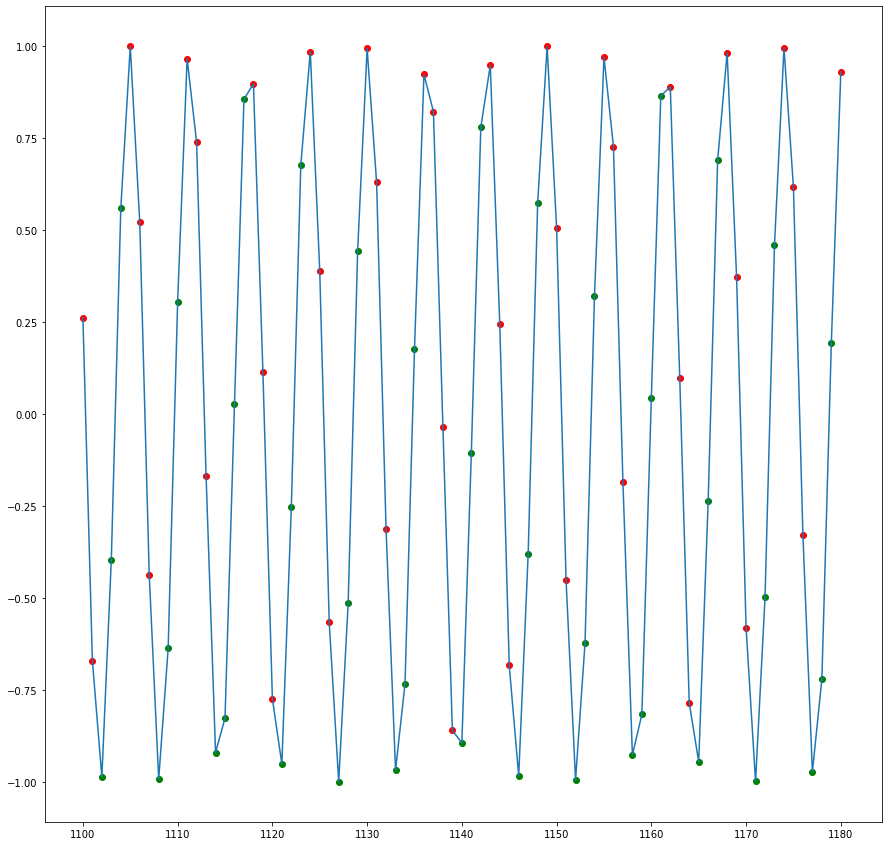

In [3]:
utils.plot(env.journal_df, start_index=1100)

In [4]:
basic(env.journal_df['Return'])


_______________________________________________________________________________________________________


Accuracy:	100.0% 
Total:		1181
Avg Win:	4629.03%	Max Win:	2791425.37%
No losses


In [5]:
data = env.fe.transform(env.df.iloc[env.end_ptr+env.shift:]).values
act_dict = {'0': 'Buy', '1': 'Sell', '2': 'Close/Hold'}
act_dict.get(str(np.argmax(dqn.compute_q_values(data[-1:]))))

'Sell'

In [6]:
test_df = env.processed_df.iloc[env.end_ptr:].copy()

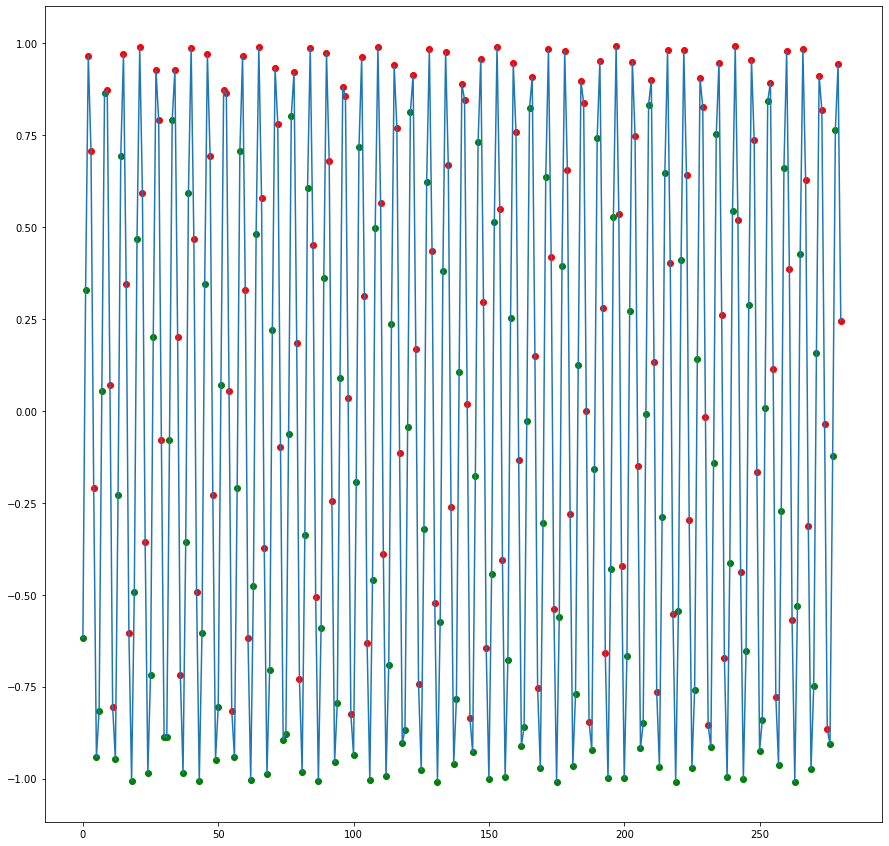

In [7]:
utils.plot(BackTest(test_df, dqn, env).out())

# Real data

In [8]:
ENV_NAME = 'Trading-v0'

env = gym.make(ENV_NAME, csv_list=['data/txf1.csv'], cycle=3)
env = wrapper.MyWrapper(env)
step_per_episode = int(env.processed_array.shape[0]*0.8)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

model = Model.simple(env)
print(model.summary())

memory = SequentialMemory(limit=200, window_length=1)
policy = EpsGreedyQPolicy(eps=0.01) #BoltzmannQPolicy()

dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-4, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mse'])
dqn.fit(env, nb_steps=step_per_episode*3, log_interval=100, visualize=True, verbose=1)
dqn.save_weights('weights/dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)
dqn.test(env, nb_episodes=1, visualize=True)

/home/zekechyo/stockExchange/lib/utils.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.transformed['return'][-1] = 0


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                832       
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_6 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_7 (Activation)    (None, 16)                0         
__________

/home/zekechyo/anaconda3/envs/stockExchange/lib/python3.6/site-packages/rl/memory.py:29: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


100/100 [==============================] - 4s - reward: 0.0378     
Interval 2 (100 steps performed)
100/100 [==============================] - 2s - reward: 0.0540     
Interval 3 (200 steps performed)
100/100 [==============================] - 2s - reward: 0.0207     
Interval 4 (300 steps performed)
100/100 [==============================] - 2s - reward: 0.0737     
Interval 5 (400 steps performed)
100/100 [==============================] - 2s - reward: 0.0647     
Interval 6 (500 steps performed)
100/100 [==============================] - 2s - reward: 0.0590     
Interval 7 (600 steps performed)
100/100 [==============================] - 2s - reward: 0.0640     
Interval 8 (700 steps performed)
100/100 [==============================] - 2s - reward: 0.0340     
Interval 9 (800 steps performed)
100/100 [==============================] - 2s - reward: 0.0618     
Interval 10 (900 steps performed)
100/100 [==============================] - 2s - reward: 0.0495     
Interval 11 (1000 step

 77/100 [======================>.......] - ETA: 1s - reward: -0.0019   done, took 233.980 seconds
Testing for 1 episodes ...


'Data: data/txf1.csv'
'CumPnL: 96.89999999999961'
'Sharpe: 3.8406700965432155'
'Sortino: 11.922346279433297'


Episode 1: reward: 96.900, steps: 2358


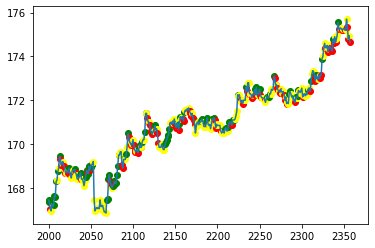

In [9]:
fig, ax = plt.subplots(1, 1)
for i in range(2000,env.journal_df.shape[0],1):
    pos = env.journal_df['Position'].iloc[i]
    if pos < 0 :
        ax.scatter(x=env.journal_df.index[i], y=env.journal_df['C'].iloc[i], color='red')
    elif pos > 0:
        ax.scatter(x=env.journal_df.index[i], y=env.journal_df['C'].iloc[i], color='green')
    else:
        ax.scatter(x=env.journal_df.index[i], y=env.journal_df['C'].iloc[i], color='yellow')
ax.plot(env.journal_df['C'][2000:])

In [10]:
from lib.analysis import basic
basic(env.journal_df['Return'])


_______________________________________________________________________________________________________


Accuracy:	31.93% 
Total:		2358
Avg Win:	0.1%	Max Win:	2.97%
Avg Loss:	0.01%	Max Loss:	0.68%


# Trading signals for testing data

In [11]:
data = env.fe.transform(env.df.iloc[env.end_ptr+env.shift:]).values
act_dict = {'0': 'Buy', '1': 'Sell', '2': 'Close/Hold'}
act_dict.get(str(np.argmax(dqn.compute_q_values(data[-1:,:]))))

/home/zekechyo/stockExchange/lib/utils.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.transformed['return'][-1] = 0


'Close/Hold'

In [12]:
from lib.utils import BackTest
test_df = env.df.iloc[env.end_ptr-env.shift:].copy()
test_df=BackTest(test_df, dqn, env).out().copy()

## Plot

In [13]:
for_cal = env.df.iloc[env.end_ptr:].copy()

In [14]:
for_cal.index=range(for_cal.shape[0])

In [15]:
test_df[['O','H','L','C']] = for_cal[['O','H','L','C']]

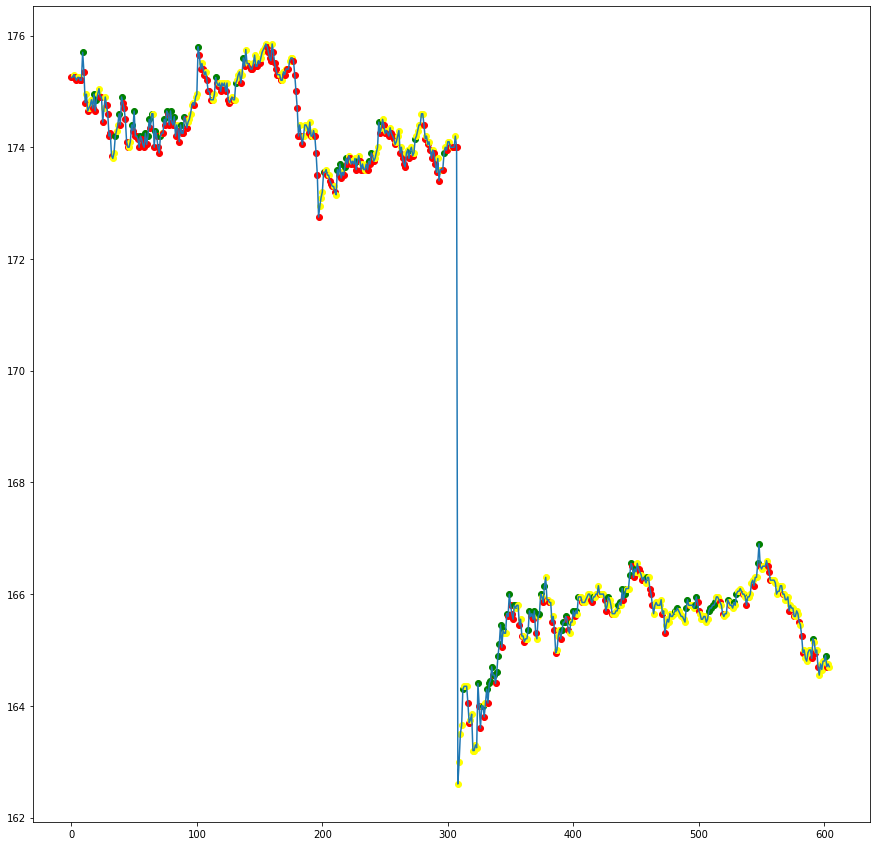

In [16]:
utils.plot(test_df)

In [17]:
basic(test_df['Return'])


_______________________________________________________________________________________________________


Accuracy:	36.03% 
Total:		605
Avg Win:	0.1%	Max Win:	6.06%
Avg Loss:	0.01%	Max Loss:	0.48%
